# LABORATORIO 4
### Paula Barillas - Diego Duarte

#### Parte 1 : Preparación del Conjunto de Datos 

Shape de entrenamiento: (50000, 32, 32, 3)
Shape de prueba: (10000, 32, 32, 3)


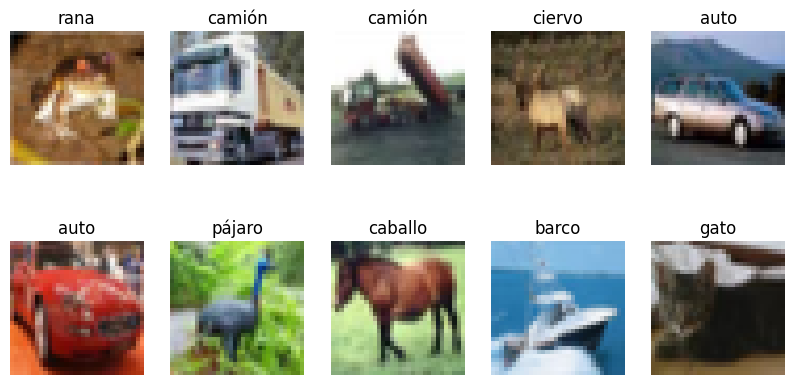

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10

# 1. Importar y cargar el dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Shape de entrenamiento:", x_train.shape)
print("Shape de prueba:", x_test.shape)

# 2. Normalización de los datos (pasar de [0,255] a [0,1])
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# 3. Mostrar ejemplos de imágenes con sus etiquetas
# CIFAR-10 tiene 10 clases: avión, auto, pájaro, gato, ciervo, perro, rana, caballo, barco, camión
class_names = ["avión", "auto", "pájaro", "gato", "ciervo", "perro", "rana", "caballo", "barco", "camión"]

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis("off")
plt.show()


#### Parte 2: Modelo Base ANN

In [2]:
import time
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

x_val = x_train[45000:]
y_val = y_train_cat[45000:]
x_train_sub = x_train[:45000]
y_train_sub = y_train_cat[:45000]

model_ann = Sequential([
    Flatten(input_shape=(32, 32, 3)),    # (32x32x3 → 3072)
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_ann.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

start = time.time()

history_ann = model_ann.fit(
    x_train_sub, y_train_sub,
    validation_data=(x_val, y_val),
    epochs=30,
    batch_size=64,
    verbose=1
)
end = time.time()

print(f"⏱ Tiempo de entrenamiento: {end - start:.2f} segundos")

c:\Users\diego\OneDrive\Escritorio\2025\Semestre VIII\DataScience\tf2-env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.2749 - loss: 2.0067 - val_accuracy: 0.3520 - val_loss: 1.8158
Epoch 2/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.3795 - loss: 1.7324 - val_accuracy: 0.3966 - val_loss: 1.6841
Epoch 3/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.4187 - loss: 1.6281 - val_accuracy: 0.4270 - val_loss: 1.6205
Epoch 4/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.4335 - loss: 1.5776 - val_accuracy: 0.4262 - val_loss: 1.6470
Epoch 5/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.4474 - loss: 1.5404 - val_accuracy: 0.4310 - val_loss: 1.6305
Epoch 6/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.4602 - loss: 1.5084 - val_accuracy: 0.4558 - val_loss: 1.5465
Epoch 7/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.4679 - loss: 1.4849 - val_accuracy: 0.4752 - val_loss: 1.4915
Epoch 8/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.4792 - loss: 1.4608 - va

#### Parte 3: Implementación de CNN

In [3]:
# implementación modelo CNN para CIFAR-10
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Definir el modelo CNN
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Early stopping para evitar sobreajuste
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

start = time.time()
history_cnn = model_cnn.fit(
    x_train_sub, y_train_sub,
    validation_data=(x_val, y_val),
    epochs=30,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)
end = time.time()

print(f"⏱ Tiempo de entrenamiento CNN: {end - start:.2f} segundos")

c:\Users\diego\OneDrive\Escritorio\2025\Semestre VIII\DataScience\tf2-env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 56s 73ms/step - accuracy: 0.2753 - loss: 1.9533 - val_accuracy: 0.5092 - val_loss: 1.4123
Epoch 2/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 44s 62ms/step - accuracy: 0.4736 - loss: 1.4606 - val_accuracy: 0.5856 - val_loss: 1.1929
Epoch 3/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - accuracy: 0.5312 - loss: 1.3054 - val_accuracy: 0.6328 - val_loss: 1.0666
Epoch 4/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 38s 54ms/step - accuracy: 0.5576 - loss: 1.2266 - val_accuracy: 0.6508 - val_loss: 1.0006
Epoch 5/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 37s 53ms/step - accuracy: 0.5818 - loss: 1.1752 - val_accuracy: 0.6570 - val_loss: 1.0053
Epoch 6/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 38s 54ms/step - accuracy: 0.6011 - loss: 1.1290 - val_accuracy: 0.6734 - val_loss: 0.9331
Epoch 7/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 39s 55ms/step - accuracy: 0.6211 - loss: 1.0736 - val_accuracy: 0.6960 - val_loss: 0.8984
Epoch 8/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 38s 54ms/step - accuracy: 0.6281 - loss: 1.0555 - 

#### Parte 4: Evaluación y Comparación

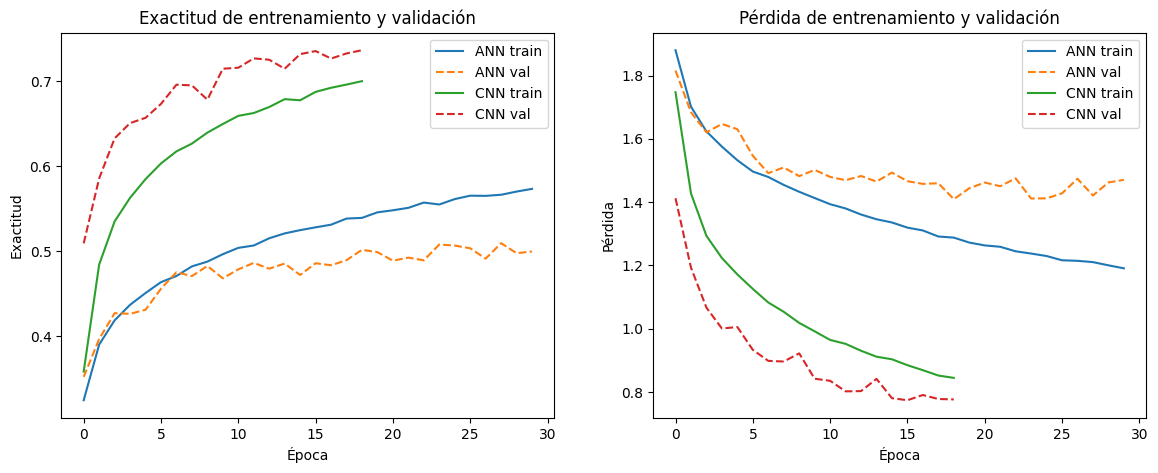


Evaluación ANN:


NameError: name 'evaluate_model' is not defined

In [ ]:
import matplotlib.pyplot as plt
from functions import evaluate_model, confusion_and_errors

# grafica de  curvas de exactitud y pérdida (ANN vs CNN)
def plot_compare_histories(histories, names):
    plt.figure(figsize=(14, 5))
    # Exactitud
    plt.subplot(1, 2, 1)
    for h, n in zip(histories, names):
        plt.plot(h.history['accuracy'], label=f'{n} train')
        plt.plot(h.history['val_accuracy'], '--', label=f'{n} val')
    plt.title('Exactitud de entrenamiento y validación')
    plt.xlabel('Época')
    plt.ylabel('Exactitud')
    plt.legend()
    # Pérdida
    plt.subplot(1, 2, 2)
    for h, n in zip(histories, names):
        plt.plot(h.history['loss'], label=f'{n} train')
        plt.plot(h.history['val_loss'], '--', label=f'{n} val')
    plt.title('Pérdida de entrenamiento y validación')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.show()

plot_compare_histories([history_ann, history_cnn], ["ANN", "CNN"])

# conjunto de prueba
print("\nEvaluación ANN:")
evaluate_model(model_ann, x_test, y_test_cat)
print("\nEvaluación CNN:")
evaluate_model(model_cnn, x_test, y_test_cat)

# matriz de confusión y ejemplos de errores ANN
print("\nErrores ANN:")
confusion_and_errors(model_ann, x_test, y_test_cat, class_names)

# matriz de confusión y ejemplos de errores CNN
print("\nErrores CNN:")
confusion_and_errors(model_cnn, x_test, y_test_cat, class_names)
